<a href="https://colab.research.google.com/github/kariuki-george/stock-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello world


In [266]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np


In [257]:
all = {}
import matplotlib.dates as mdates

sheets_dataframe = pd.read_excel("stock prices.xlsx", sheet_name=None)



for sheet_name in sheets_dataframe.keys():
  # print(sheet_name)
  sheet = sheets_dataframe[sheet_name]
  for index in range(50):
    row = sheet.iloc(0)[index]

    if row["COMPANY"] == None:
      continue

    if row["COMPANY"] not in all:
      all[row["COMPANY"]] = []


    if sheet_name == "259":
      updated = mdates.date2num(pd.to_datetime("2023-09-25 00:00:00"))
    elif sheet_name == "710":
      updated = mdates.date2num(pd.to_datetime("2023-10-07 00:00:00"))
    else:
      updated = mdates.date2num(row["UPDATED"])

    all[row["COMPANY"]].append({"COMPANY": row["COMPANY"],
                                "PRICE":   row["PRICE"],
                                "% CHANGE":row["% CHANGE"],
                                "VALUE":  row["VALUE"],
                                "VOLUME":        row["VOLUME"],
                                "YTD %":        row["YTD %"],
                                "UPDATED": updated })



for key in all.keys():
  company = all[key]
  clean = pd.DataFrame(company)
  clean.to_csv(key + '.csv', mode='w', index=False, header=True)




In [258]:
data = pd.read_csv("SAFARICOM.csv")
print(data)


      COMPANY  PRICE  % CHANGE      VALUE    VOLUME  YTD %  UPDATED
0   SAFARICOM   15.0      0.33  124344000   8289600 -37.89  19625.0
1   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
2   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
3   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
4   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
5   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
6   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
7   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
8   SAFARICOM   12.1     -1.63    8535340    705400 -49.90  19663.0
9   SAFARICOM   13.8      0.00   87722460   6356700 -42.86  19649.0
10  SAFARICOM   13.8      0.00   87722460   6356700 -42.86  19649.0
11  SAFARICOM   13.8      0.00   87722460   6356700 -42.86  19649.0
12  SAFARICOM   13.8      0.00   87722460   6356700 -42.86  19649.0
13  SAFARICOM   13.8      0.00   87722460   6356

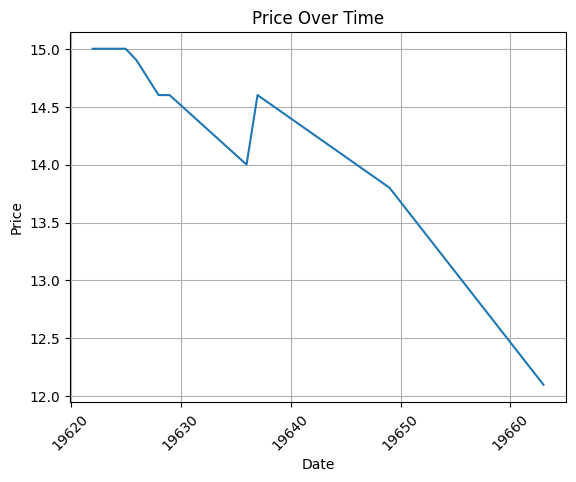

In [259]:
# Assuming 'UPDATED' is the x-axis and 'PRICE' is the y-axis
dataX=data.sort_values(by='UPDATED')
plt.plot(dataX['UPDATED'], dataX['PRICE'])

# Customize the plot
plt.title('Price Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

Accuracy: 0.9999999152488754
Mean Squared Error: 8.644614699943173e-08
Root Mean Squared Error (RMSE): 0.00029401725629532653





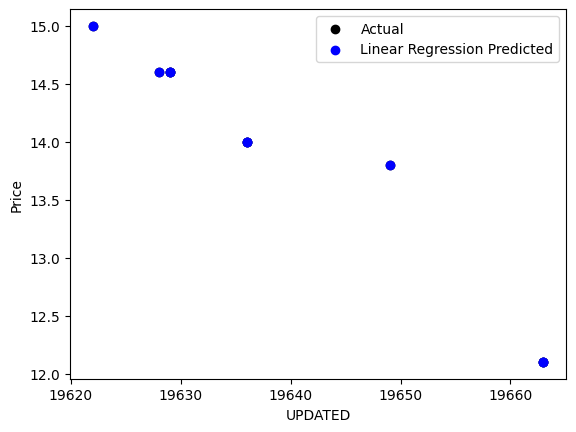

In [288]:
# Linear regression
from sklearn.linear_model import LinearRegression
# Assuming df is your DataFrame with 'PRICE' and other relevant columns

linear_data = data


# Features (X) and target variable (y)
x = linear_data[[ '% CHANGE', 'VALUE', 'VOLUME', 'YTD %','UPDATED']]  # Replace with your actual feature columns
y = linear_data['PRICE']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(x_test)

acc = linear_model.score(x_test,y_test)

print(f'Accuracy: {acc}')

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse_linear}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'Root Mean Squared Error (RMSE): {rmse}\n\n\n')


# Visualize predictions against actual values
# Plotting predictions against actual values
plt.scatter(x_test['UPDATED'], y_test, color='black', label='Actual')
plt.scatter(x_test['UPDATED'], y_pred_linear, color='blue', label='Linear Regression Predicted')
plt.xlabel('UPDATED')
plt.ylabel('Price')
plt.legend()
plt.show()

In [231]:
# Decision tree

Accuracy: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error (RMSE): 0.0





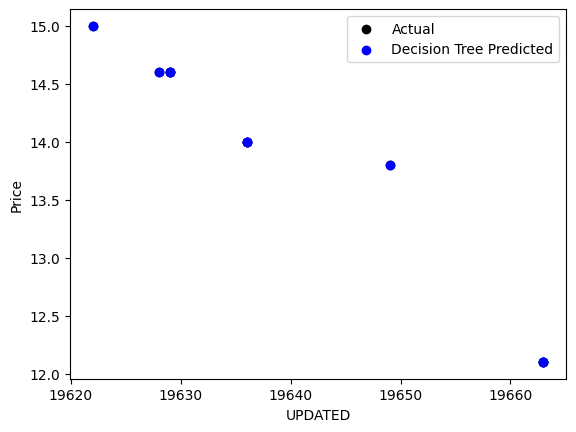

In [289]:
from sklearn.tree import DecisionTreeRegressor



# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(x_test)

acc = tree_model.score(x_test,y_test)

print(f'Accuracy: {acc}')

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error: {mse_linear}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f'Root Mean Squared Error (RMSE): {rmse}\n\n\n')


# Visualize predictions against actual values
# Plotting predictions against actual values
plt.scatter(x_test['UPDATED'], y_test, color='black', label='Actual')
plt.scatter(x_test['UPDATED'], y_pred_tree, color='blue', label='Decision Tree Predicted')
plt.xlabel('UPDATED')
plt.ylabel('Price')
plt.legend()
plt.show()


Accuracy: 0.9862078431372545
Mean Squared Error: 0.014068000000000351
Root Mean Squared Error (RMSE): 0.11860860002546338





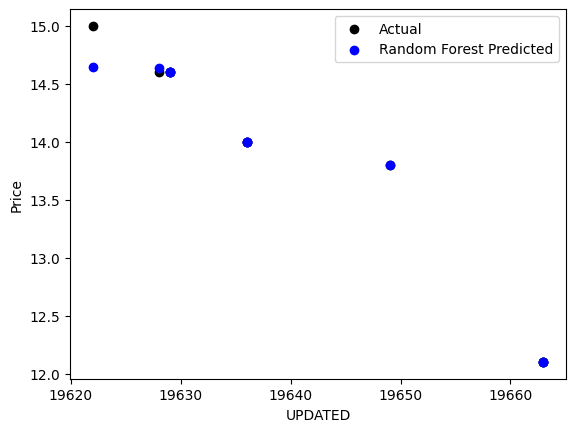

In [293]:
# random forest
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_model.predict(x_test)

acc = forest_model.score(x_test,y_test)

print(f'Accuracy: {acc}')

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_forest)
print(f'Mean Squared Error: {mse_linear}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f'Root Mean Squared Error (RMSE): {rmse}\n\n\n')


# Visualize predictions against actual values
# Plotting predictions against actual values
plt.scatter(x_test['UPDATED'], y_test, color='black', label='Actual')
plt.scatter(x_test['UPDATED'], y_pred_forest, color='blue', label='Random Forest Predicted')
plt.xlabel('UPDATED')
plt.ylabel('Price')
plt.legend()
plt.show()
